In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from matplotlib.backends.backend_pdf import PdfPages
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'


In [2]:
cut_ee = pd.read_excel(r'..\taidi\demo2\Q2_resume(分词).xlsx' )
cut_er = pd.read_excel(r'..\taidi\demo2\Q2_joblist(分词).xlsx')

### 词云图

In [3]:

from collections import Counter
from wordcloud import WordCloud
import jieba
from PIL import Image, ImageFilter


In [5]:
samples = cut_ee.iloc[30]
# samples = cut_ee.iloc[19]
samples = samples.fillna('彳亍')
# samples = employee[employee.index == 2]
samples
# samples = pd.DataFrame(samples)
# samples.index
# str(list(samples[cols]))
# list(samples[cols])
# samples[cols]
# ''.join(samples[cols].values)
samples['willSalaryStart'] = str(samples['willSalaryStart']) + '元'
samples['willSalaryEnd'] = str(samples['willSalaryEnd']) + '元'
pd.DataFrame(samples)
# list(samples.index)

30
index                                 31
id                   1467789372454731776
username                             黄女士
expectPosition     数据分析师,机器学习工程师,图像处理工程师
address                        广东省广州市天河区
...                                  ...
is_graduate                          非应届
highest_education                     本科
province                             广东省
county                               广州市
region                               天河区

[61 rows x 1 columns]

In [10]:
samples1 = cut_ee.iloc[11]
# samples1 = cut_ee.iloc[45]
samples1 = samples1.fillna('彳亍')
# samples = employee[employee.index == 2]
samples1
# samples = pd.DataFrame(samples)
# samples.index
# str(list(samples[cols]))
# list(samples[cols])
# samples[cols]
# ''.join(samples[cols].values)
samples1['willSalaryStart'] = str(samples1['willSalaryStart']) + '元'
samples1['willSalaryEnd'] = str(samples1['willSalaryEnd']) + '元'
pd.DataFrame(samples1)

11
index                               12
id                 1461666278635864064
username                           张先生
expectPosition           数据挖掘工程师,算法工程师
address                      陕西省咸阳市杨陵区
...                                ...
is_graduate                        非应届
highest_education                   硕士
province                           广东省
county                             深圳市
region                             宝安区

[61 rows x 1 columns]

In [11]:
cols = [
    'username',
    'expectPosition',
    'address',
    'sex',
    'job_wanted_status',
    'arrivalTime',
    # 'birthday',
    'exp',
    'political',
    'selfEvaluation',
    'expectIndustry',
    'workNature',
    'willSalaryStart',
    'willSalaryEnd',
    'expectCity',
    'eduEp_educationBackgrounds',
    'eduEP_schools',
    # 'eduEp_start',
    # 'eduEp_end',
    'eduEP_specialities',
    'projectEP_companies',
    'projectEP_projectNames',
    'projectEp_descriptions',
    # 'projectEP_start',
    # 'projectEP_end',
    'projectEP_roleNames',
    'projectEP_achievements',
    'trainEp_orgName',
    'trainEP_recordName',
    # 'trainEP_start',
    # 'trainEP_end',
    'trainEP_description',
    'workEp_companies',
    'workEp_industries',
    # 'workEp_start',
    # 'workEp_end',
    'workEp_positionNames',
    'workEP_descriptions',
    'keyword_info',
    'lang_info',
    'cert_info',
    'skill_info',
    'com_info',
    'concatenated',
    'selfEvaluation_keywords',
    'workEP_descriptions_keywords',
    'projectEp_descriptions_keywords',
    'projectEP_achievements_keywords',
    'trainEP_description_keywords',
    'age',
    # 'edutime_days',
    # 'worktime_days',
    # 'traintime_days',
    # 'projecttime_days',
    # 'is_graduate',
    # 'province',
    # 'county',
    # 'region'
    ]

username                                                                         黄女士
expectPosition                                                 数据分析师,机器学习工程师,图像处理工程师
address                                                                    广东省广州市天河区
sex                                                                                女
job_wanted_status                                                              毕业找工作
arrivalTime                                                                     随时到岗
exp                                                                              无经验
political                                                                       中共党员
selfEvaluation                     熟悉基于Python的数据分析、机器学习、深度学习；\n熟悉分类、聚类、预测等常用算法逻辑；...
expectIndustry                                                                    不限
workNature                                                                        全职
willSalaryStart                                                  

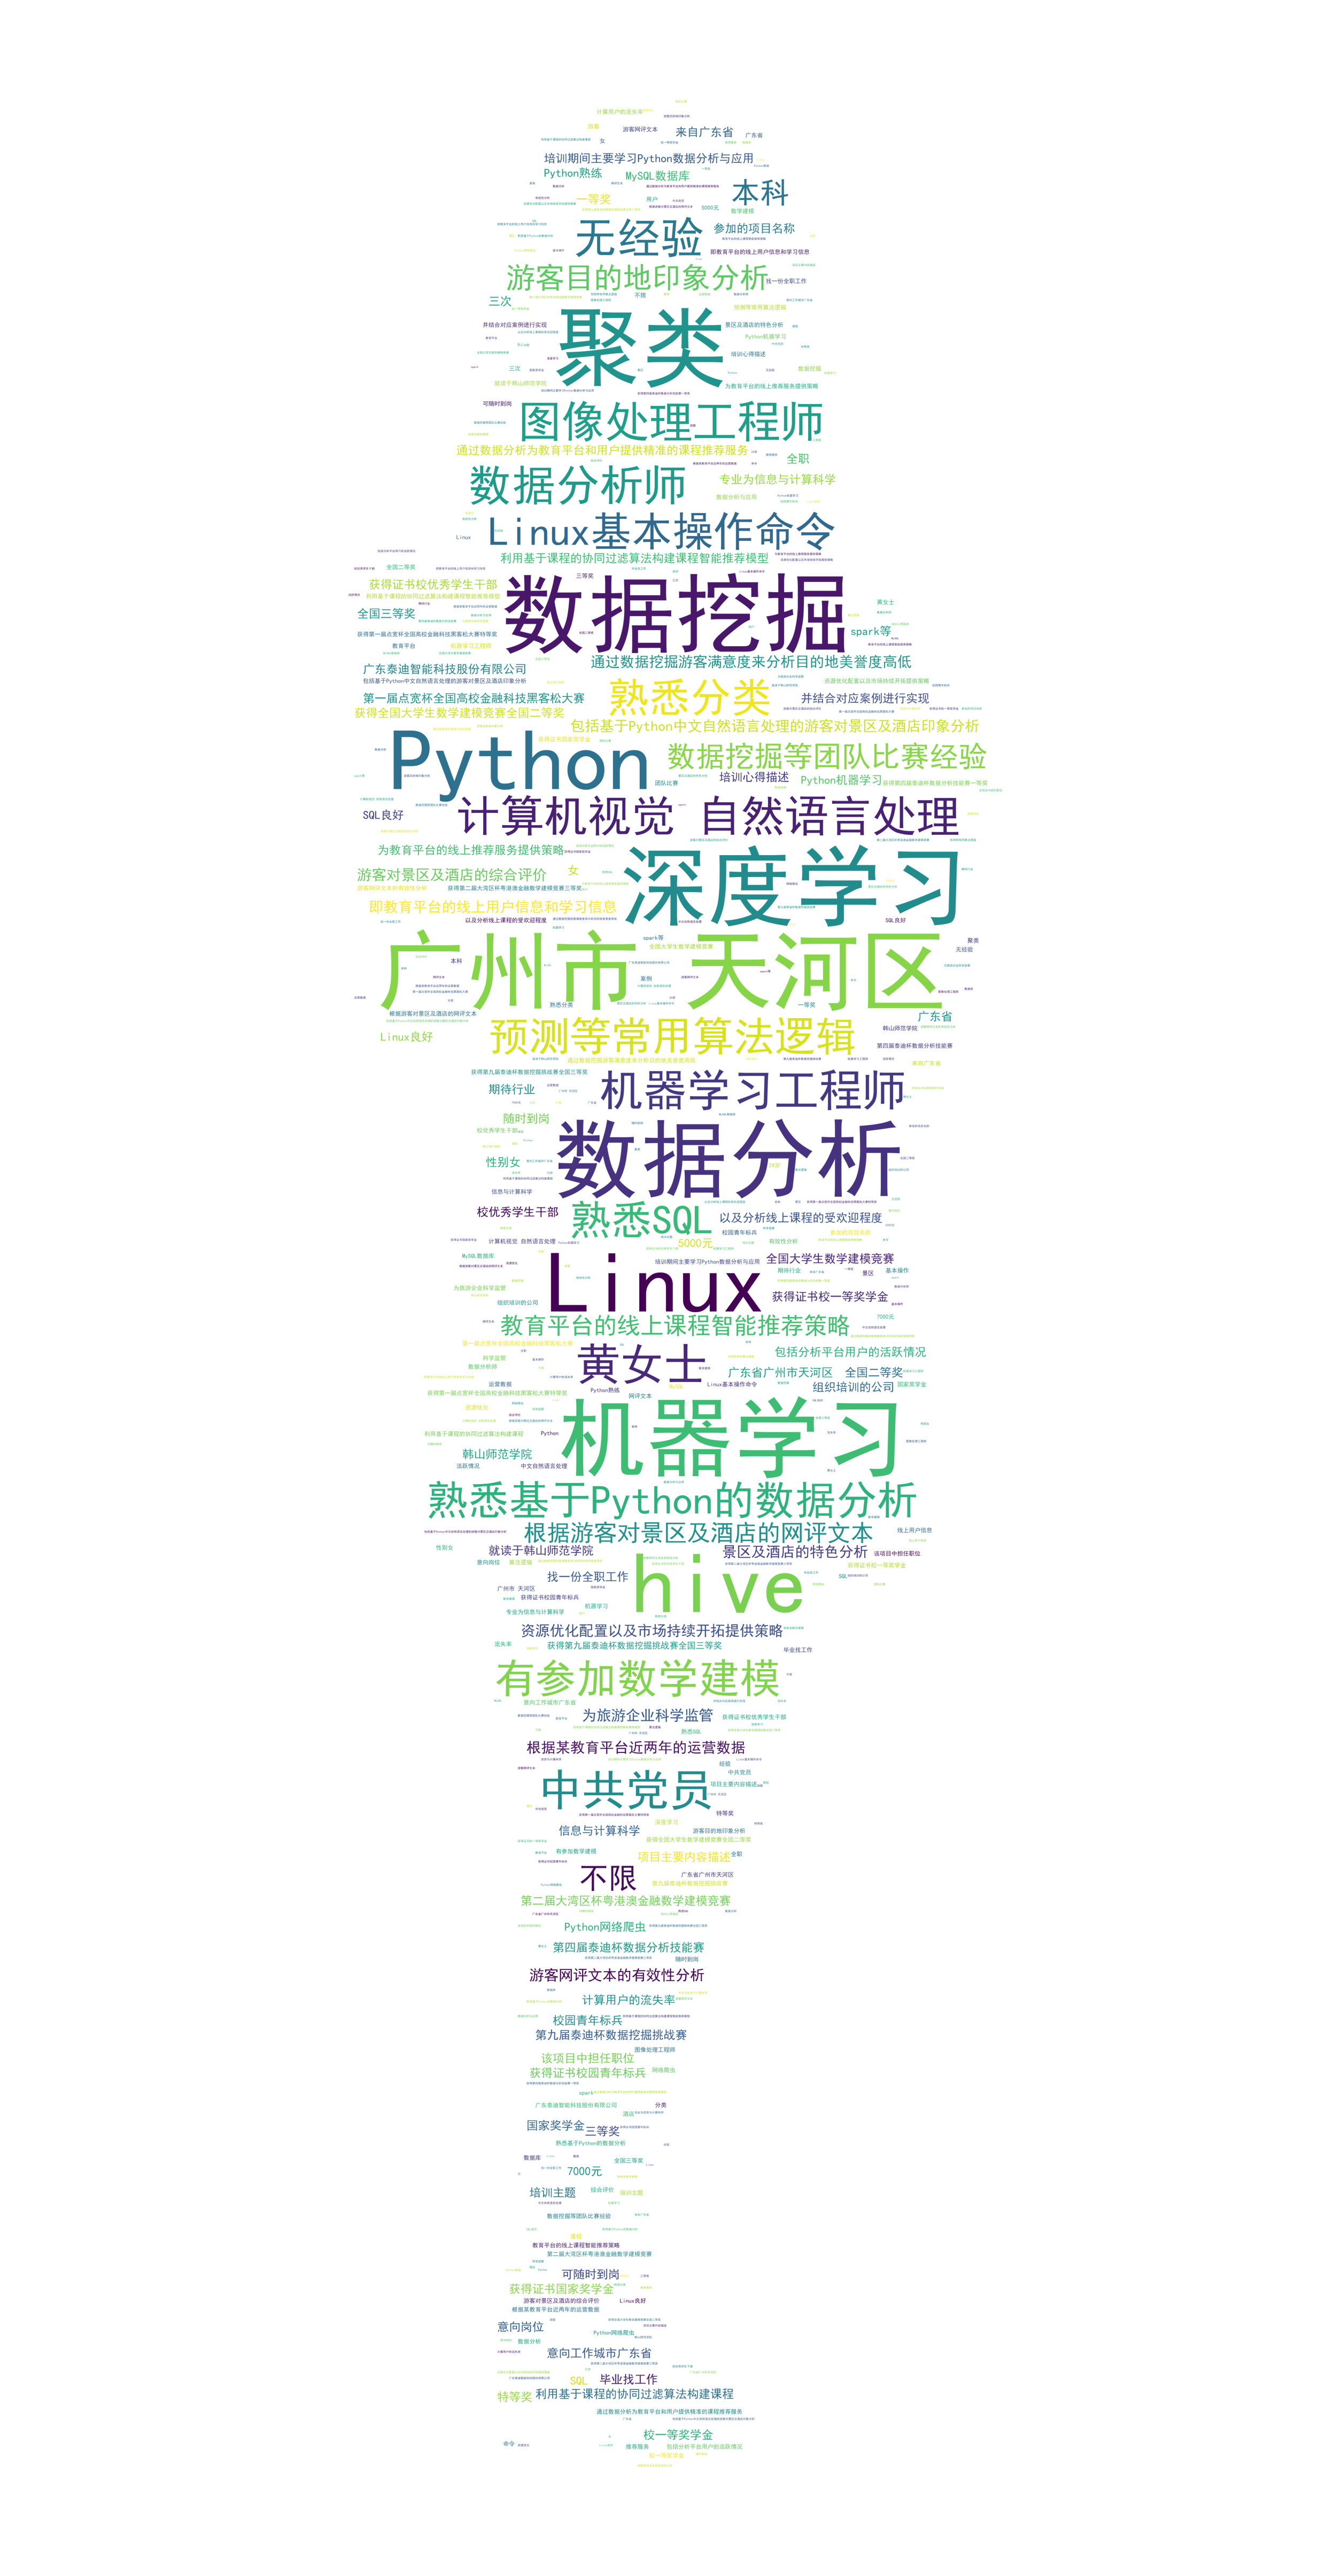

In [14]:

#个人能力
# cols = list(employee1.columns) 
# cols = cols.remove('id')
# cols = ['username', 'expectPosition', 
        # 'sex', 'arrivalTime', 
        # 'exp', 'political','workNature',
        # 'willSalaryStart','willSalaryEnd',
        # 'eduEp_educationBackgrounds','eduEP_specialities',
        # 'cert_info','skill_info','keyword_info','skill_info']

# # cols1 = ['competition_info', 'workEP_descriptions', 
#         'eduEp_educationBackgrounds', 'skills_info', 
#         'cert_info', 'exp','workEp_positionNames',
#         'willSalaryStart','willSalaryEnd',
#         'trainEP_description_keywords','eduEP_specialities','willNature',
#         'username','expectPosition','expectCity','projectEp_descriptions']
print(samples[cols])


texts = ' '.join(samples[cols].values)
# texts = texts *3
print(texts)


color_mask = np.array(Image.open('female.png')) # 指定背景图形状
#词云图
wc = WordCloud(mask=color_mask,
               repeat = True,
               random_state = 12,
               width = 400,
               height = 200,
               scale=19,
               collocations=True,
                stopwords=['nan','\'','一般','彳亍','熟练','良好','所属行业'],
                background_color = 'white',
                min_font_size = 1,
                max_font_size = 30,
                max_words=2000,
                prefer_horizontal  = 1, # 控制词的方向#控制词的方向
                font_path ='simhei.ttf') #中文字体msyh


words = wc.generate(texts)  #自动随机添加词频


# im_blur = words.filter(PIL.ImageFilter.BLUR)

# # 对模糊处理后的图片进行锐化处理
# im_sharp = im_blur.filter(ImageFilter.SHARPEN)

# # 显示原图和处理后的图片
# words.show()
# im_sharp.show()

plt.figure(figsize=(8, 6), dpi=1000)
plt.imshow(words)
# plt.savefig('female用户wordcloud1.png', dpi=1000, bbox_inches='tight')
plt.axis('off')
plt.savefig('female用户wordcloud.pdf', dpi=1000, bbox_inches='tight')





username                                                                         张先生
expectPosition                                                         数据挖掘工程师,算法工程师
address                                                                    陕西省咸阳市杨陵区
sex                                                                                男
job_wanted_status                                                              毕业找工作
arrivalTime                                                                     时间待议
exp                                                                           1年工作经验
political                                                                       中共党员
selfEvaluation                                                       积极参加学术研究，具有钻研精神
expectIndustry                                                                   互联网
workNature                                                                        全职
willSalaryStart                                                  

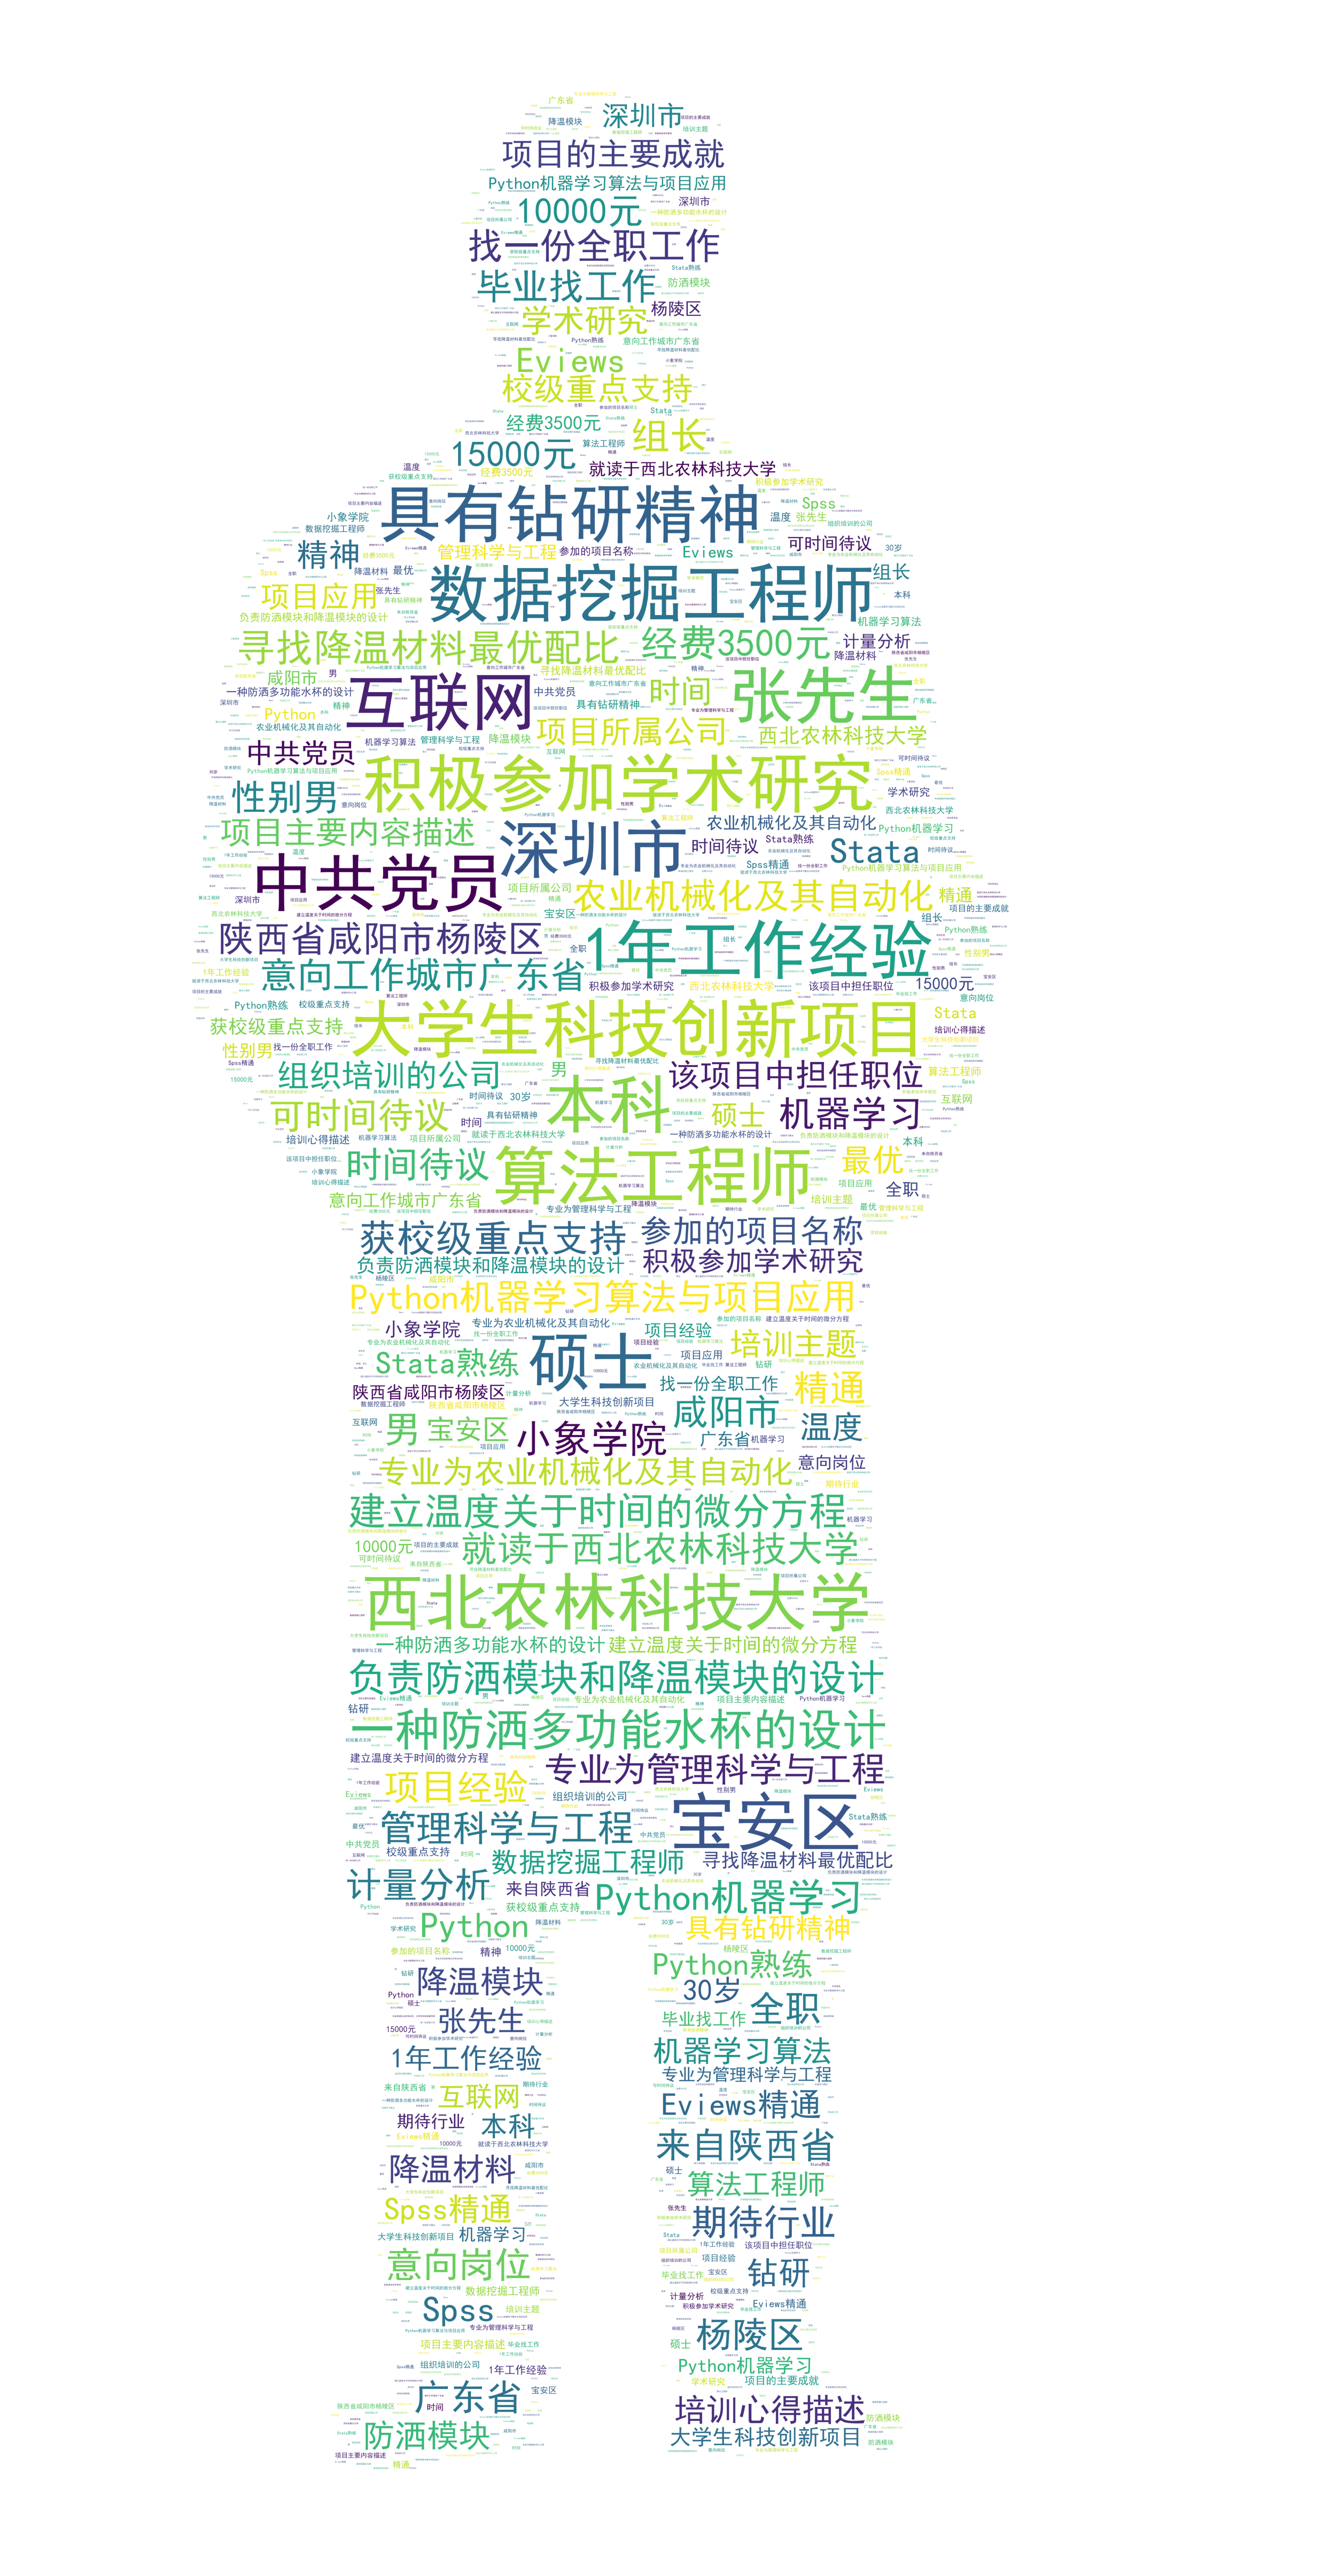

In [15]:

#个人能力
# cols = list(employee1.columns) 
# cols = cols.remove('id')
# cols = ['username', 'expectPosition', 
        # 'sex', 'arrivalTime', 
        # 'exp', 'political','workNature',
        # 'willSalaryStart','willSalaryEnd',
        # 'eduEp_educationBackgrounds','eduEP_specialities',
        # 'cert_info','skill_info','keyword_info','skill_info']

# # cols1 = ['competition_info', 'workEP_descriptions', 
#         'eduEp_educationBackgrounds', 'skills_info', 
#         'cert_info', 'exp','workEp_positionNames',
#         'willSalaryStart','willSalaryEnd',
#         'trainEP_description_keywords','eduEP_specialities','willNature',
#         'username','expectPosition','expectCity','projectEp_descriptions']
print(samples1[cols])


texts = ' '.join(samples1[cols].values)
# texts = texts *3
print(texts)


color_mask = np.array(Image.open('male.png')) # 指定背景图形状
#词云图
wc = WordCloud(mask=color_mask,
               repeat = True,
               random_state = 123,
               width = 400,
               height = 200,
               scale=19,
               collocations=True,
                stopwords=['nan','\'','一般','彳亍','熟练','良好'],
                background_color = 'white',
                min_font_size = 1,
                max_font_size = 30,
                max_words=2000,
                prefer_horizontal  = 1, # 控制词的方向#控制词的方向
                font_path ='simhei.ttf') #中文字体msyh


words = wc.generate(texts)  #自动随机添加词频


# im_blur = words.filter(PIL.ImageFilter.BLUR)

# # 对模糊处理后的图片进行锐化处理
# im_sharp = im_blur.filter(ImageFilter.SHARPEN)

# # 显示原图和处理后的图片
# words.show()
# im_sharp.show()

plt.figure(figsize=(8, 6), dpi=1000)
plt.imshow(words)
# plt.savefig('male用户wordcloud1.png', dpi=1000, bbox_inches='tight')
plt.axis('off')
plt.savefig('male用户wordcloud.pdf', dpi=1000, bbox_inches='tight')

In [ ]:
cut_ee.iloc[9]
# cut_ee['eduEP_specialities'].value_counts

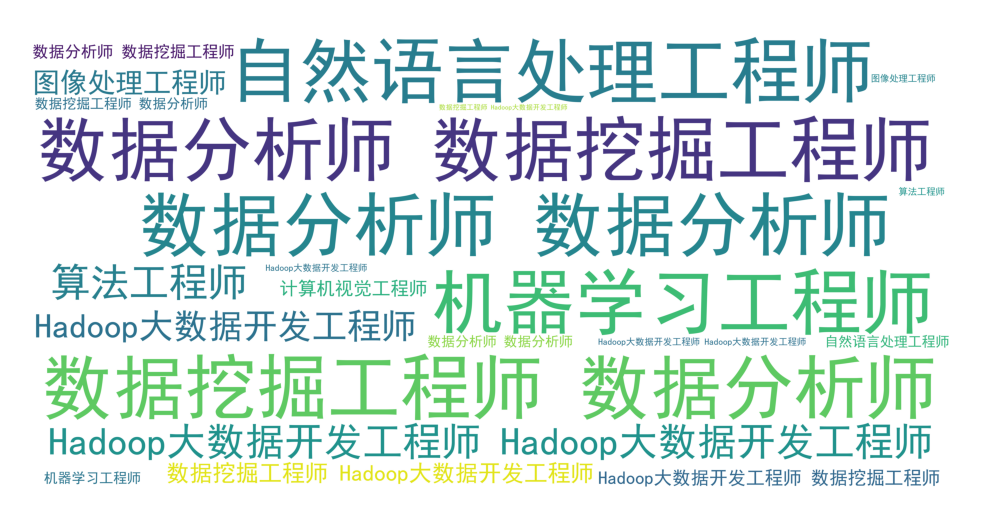

In [16]:
# 将“function”列用逗号合并成文本
text = ','.join(cut_ee['expectPosition'])

# 生成词云图
wordcloud = WordCloud(width=400, height=200, 
                      font_path ='simhei.ttf', 
                      stopwords=['nan','\'','一般','彳亍','熟练','良好','其他'],
                    repeat = True,
                    random_state = 123,
                    scale=19,
                      prefer_horizontal  = 1, 
                      min_font_size = 3,
                      background_color='white').generate(text)
plt.figure(figsize=(4, 2), dpi=300)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('期望工作wordcloud.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# cut_ee['age'] = cut_ee['age'].str.replace('岁', '').str.strip()  # 删除“岁”字并去除首尾空格
# cut_ee = cut_ee[cut_ee['age'] != '']  # 过滤掉空字符串
# cut_ee['age'] = cut_ee['age'].astype(int)  # 转换为整数类型
# a = sns.FacetGrid( cut_ee, hue = 'sex', aspect=4 )
# a.map(sns.kdeplot, 'age', fill= True )
# a.set(xlim=(0 , cut_ee['age'].max()))
# a.add_legend()

<Figure size 3600x1500 with 0 Axes>

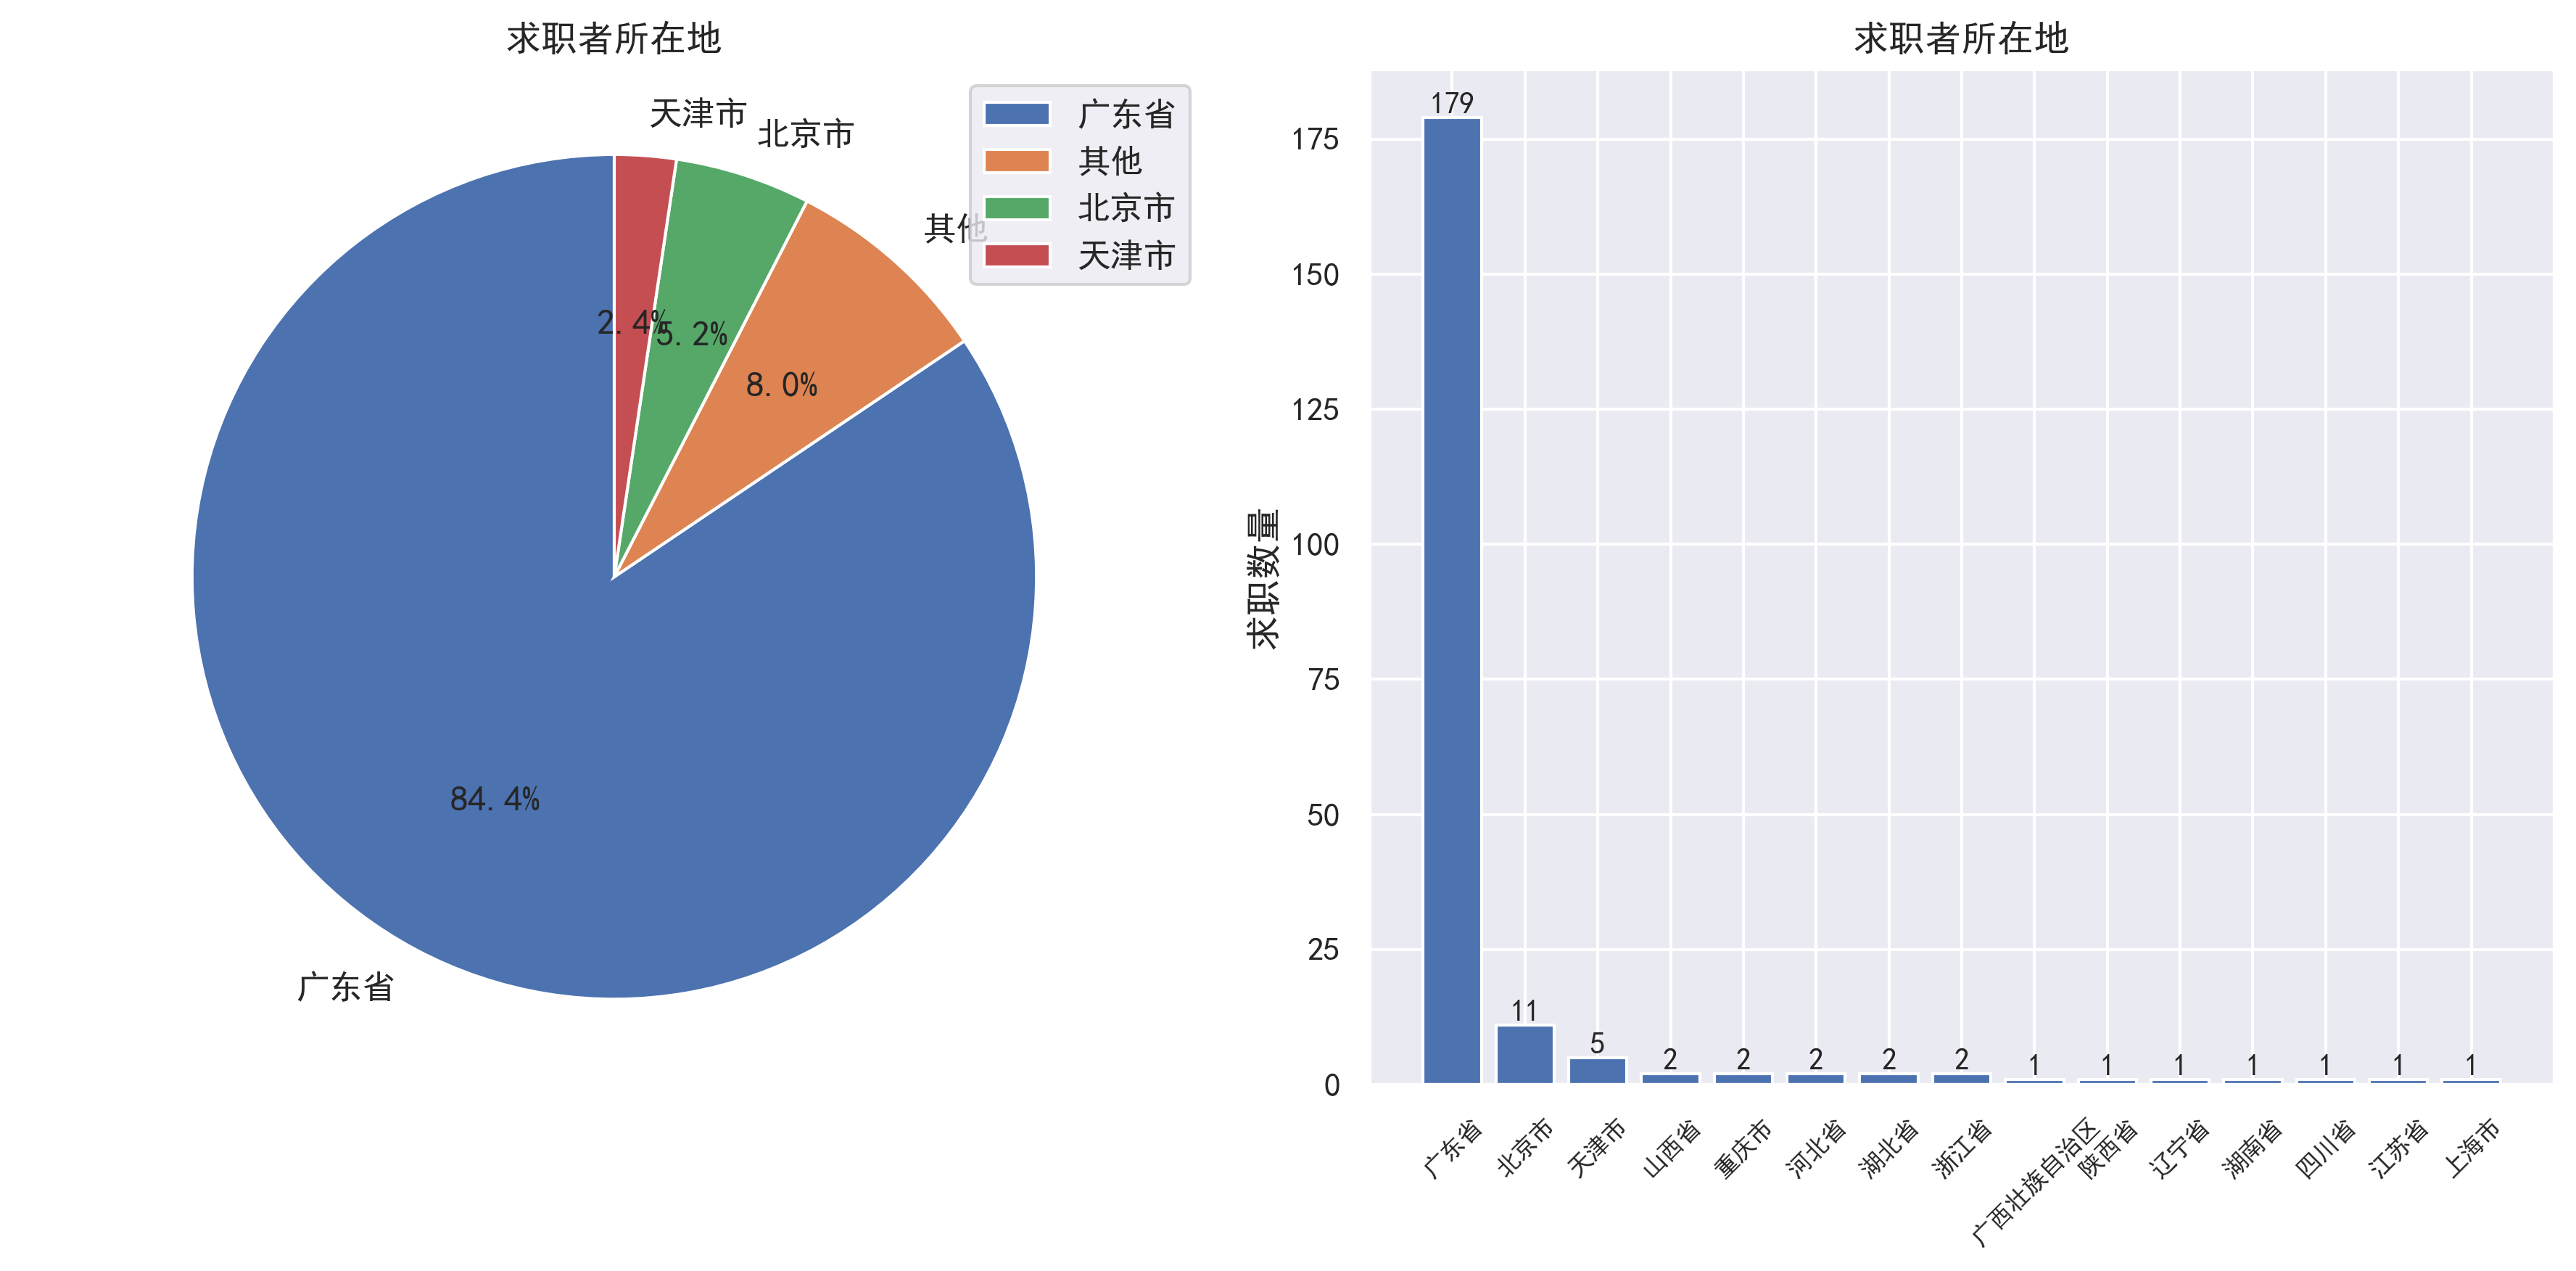

In [17]:

# 设置画布大小
plt.figure(figsize=(12,5), dpi=300,facecolor='w')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1)        # 解决Seaborn中文显示问题
# 绘图
plt.figure(figsize=(12, 6), dpi=300, facecolor='w')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 将非“广东省”值替换为“其他”
a_er1 = cut_ee.dropna(subset=['province'])
a_er1.loc[~a_er1['province'].str.contains('广东省|北京市|天津市'), 'province'] = '其他'
# 数据
labels1 = a_er1['province'].value_counts().index
values1 = a_er1['province'].value_counts().values


plt.subplot(1, 2, 1)
plt.pie(values1, labels=labels1, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('求职者所在地')
plt.legend()

plt.subplot(1, 2, 2)
count_num = cut_ee['province'].value_counts()
bar = plt.bar(count_num.index, count_num.values)
for x, y in zip(count_num.index, count_num.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)  # 显示数字
plt.xticks(rotation=45, fontsize=8)
plt.title('求职者所在地')
plt.ylabel('求职数量')

plt.tight_layout()
plt.savefig('求职地区分布wordcloud.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# set(cut_ee['eduEp_educationBackgrounds'])
set(cut_ee['exp'])

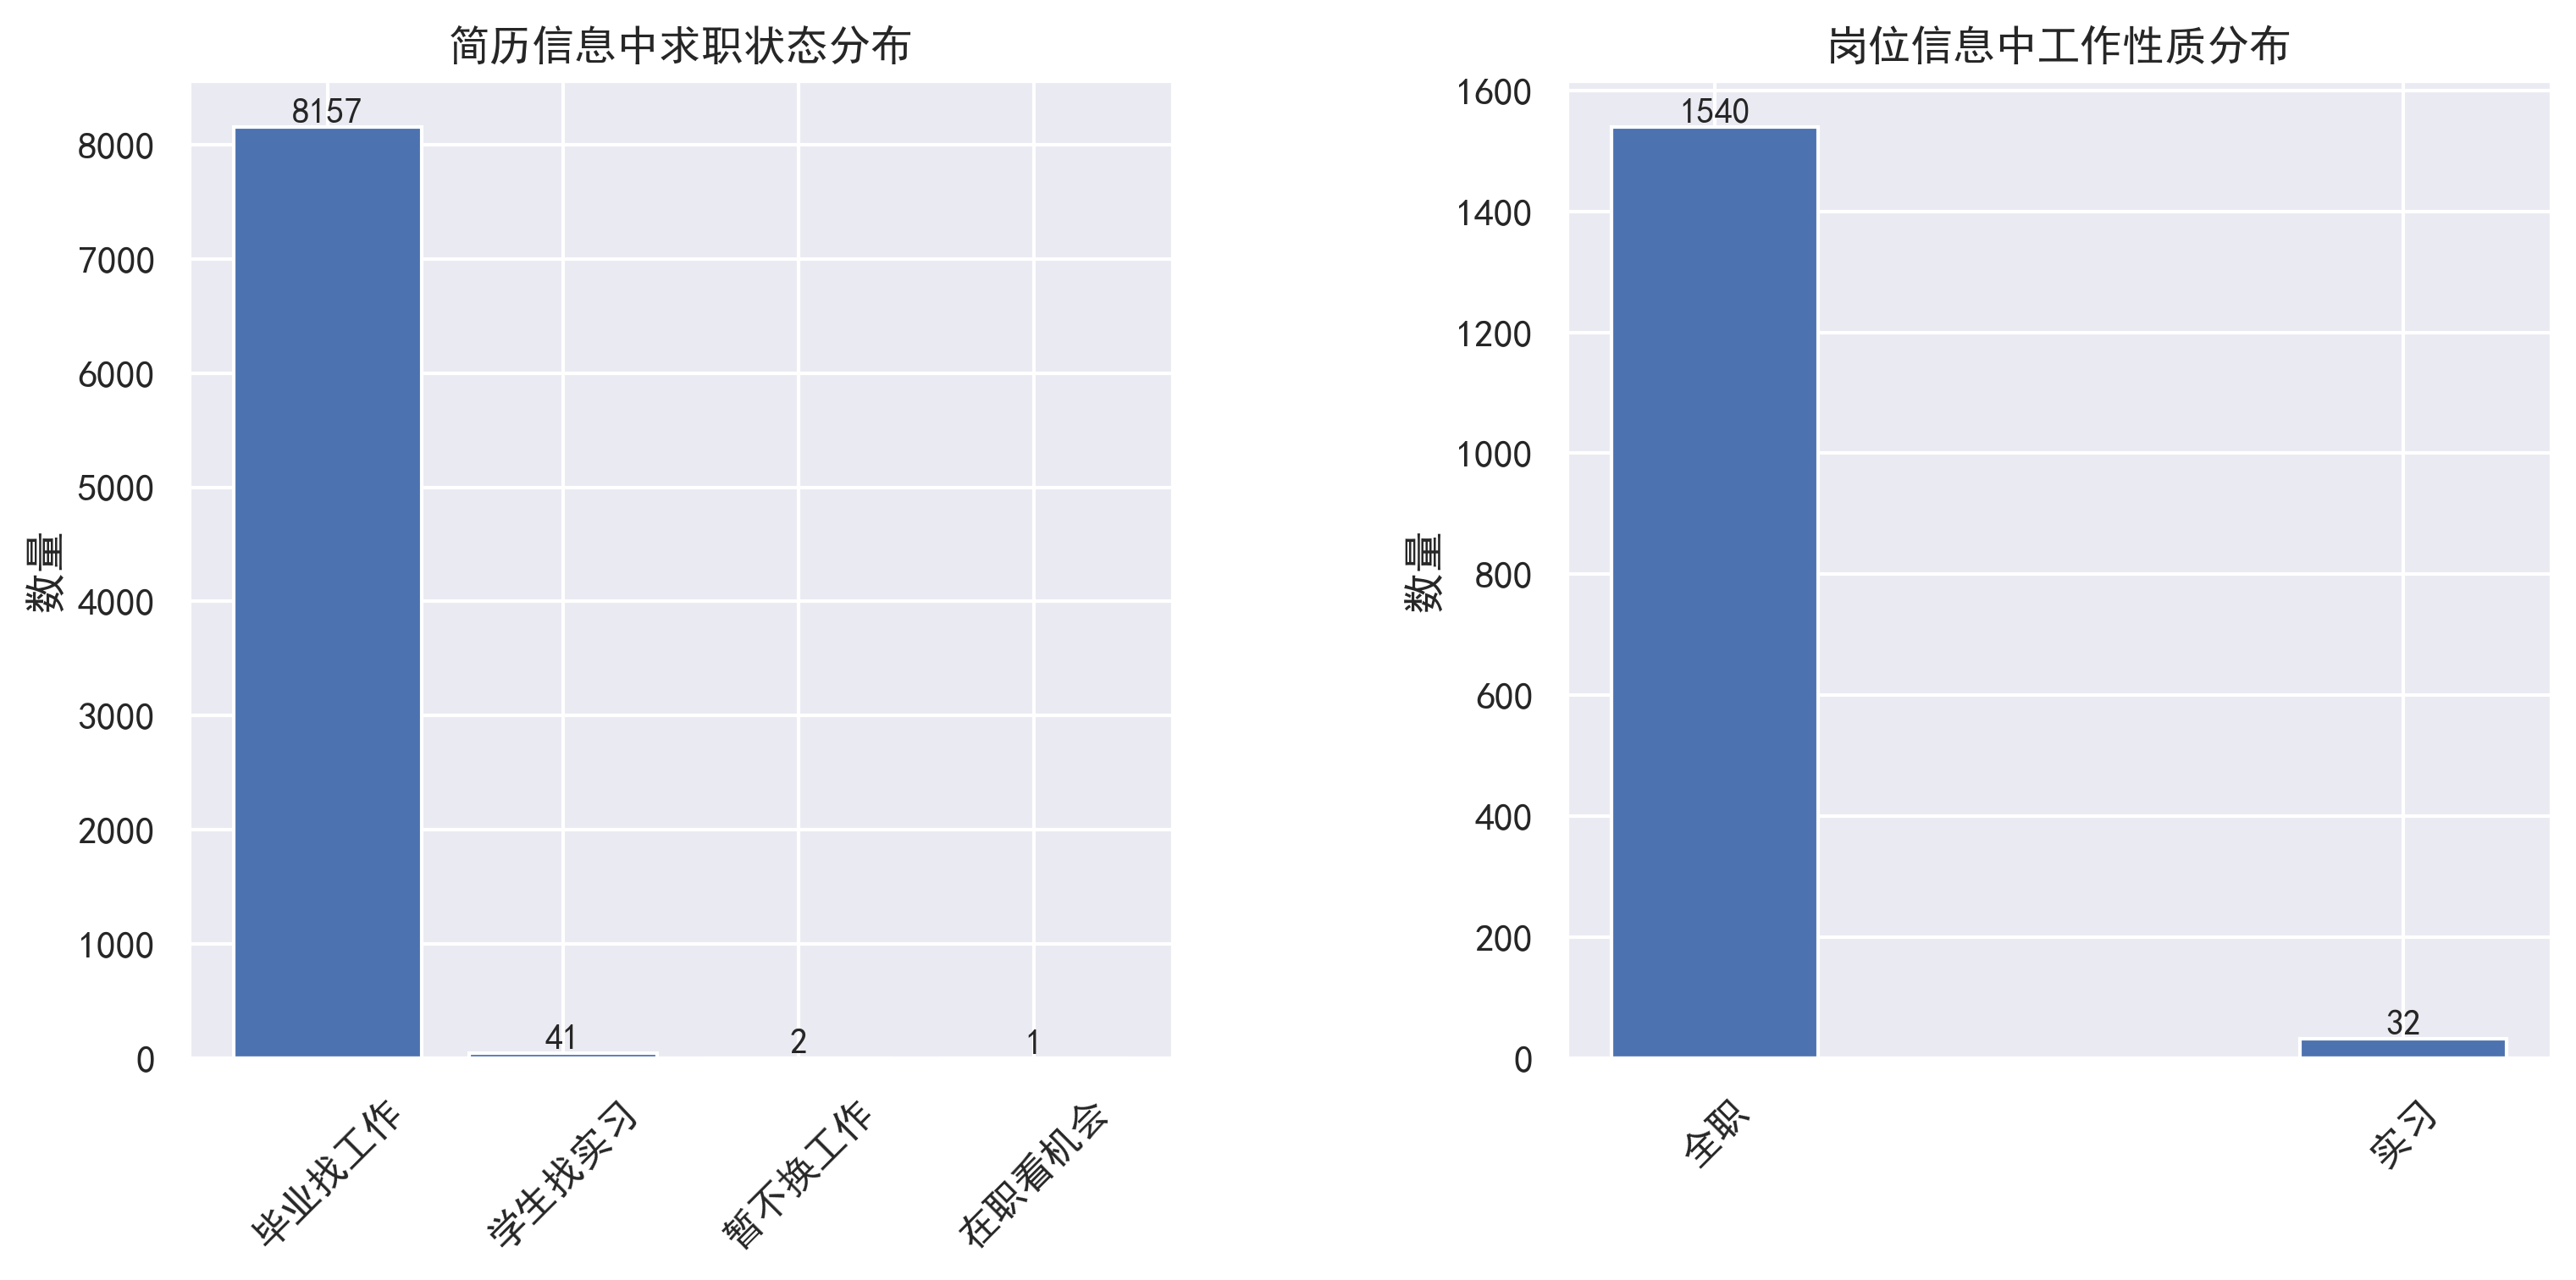

In [18]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1)        # 解决Seaborn中文显示问题
# 统计分类数据“job_wanted_status”和“willNature”各个类别的数量
cut_ee_counts = cut_ee['job_wanted_status'].value_counts()
cut_er_counts = cut_er['willNature'].value_counts()

# 设置画布大小
plt.figure(figsize=(12,5), dpi=300,facecolor='w')


# 第一张图
plt.subplot(1, 2, 1)

bar = plt.bar(cut_ee_counts.index, cut_ee_counts.values)#color="gray",edgecolor="k",hatch="///"
for x, y in zip(cut_ee_counts.index, cut_ee_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)  # 显示数字
plt.xticks(rotation=45)

plt.title('简历信息中求职状态分布')
# plt.xlabel('求职状态')
plt.ylabel('数量')

# 使用matplotlib库绘制条形图2
plt.subplot(1, 2, 2)
bar = plt.bar(cut_er_counts.index, cut_er_counts.values, width=0.3)#color="gray",edgecolor="k",hatch="///"
for x, y in zip(cut_er_counts.index, cut_er_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)  # 显示数字
plt.xticks(rotation=45)
plt.title('岗位信息中工作性质分布')
# plt.xlabel('工作性质')
plt.ylabel('数量')

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.4)

# 显示图形
plt.savefig('求职-岗位.pdf', dpi=300, bbox_inches='tight')
plt.show()

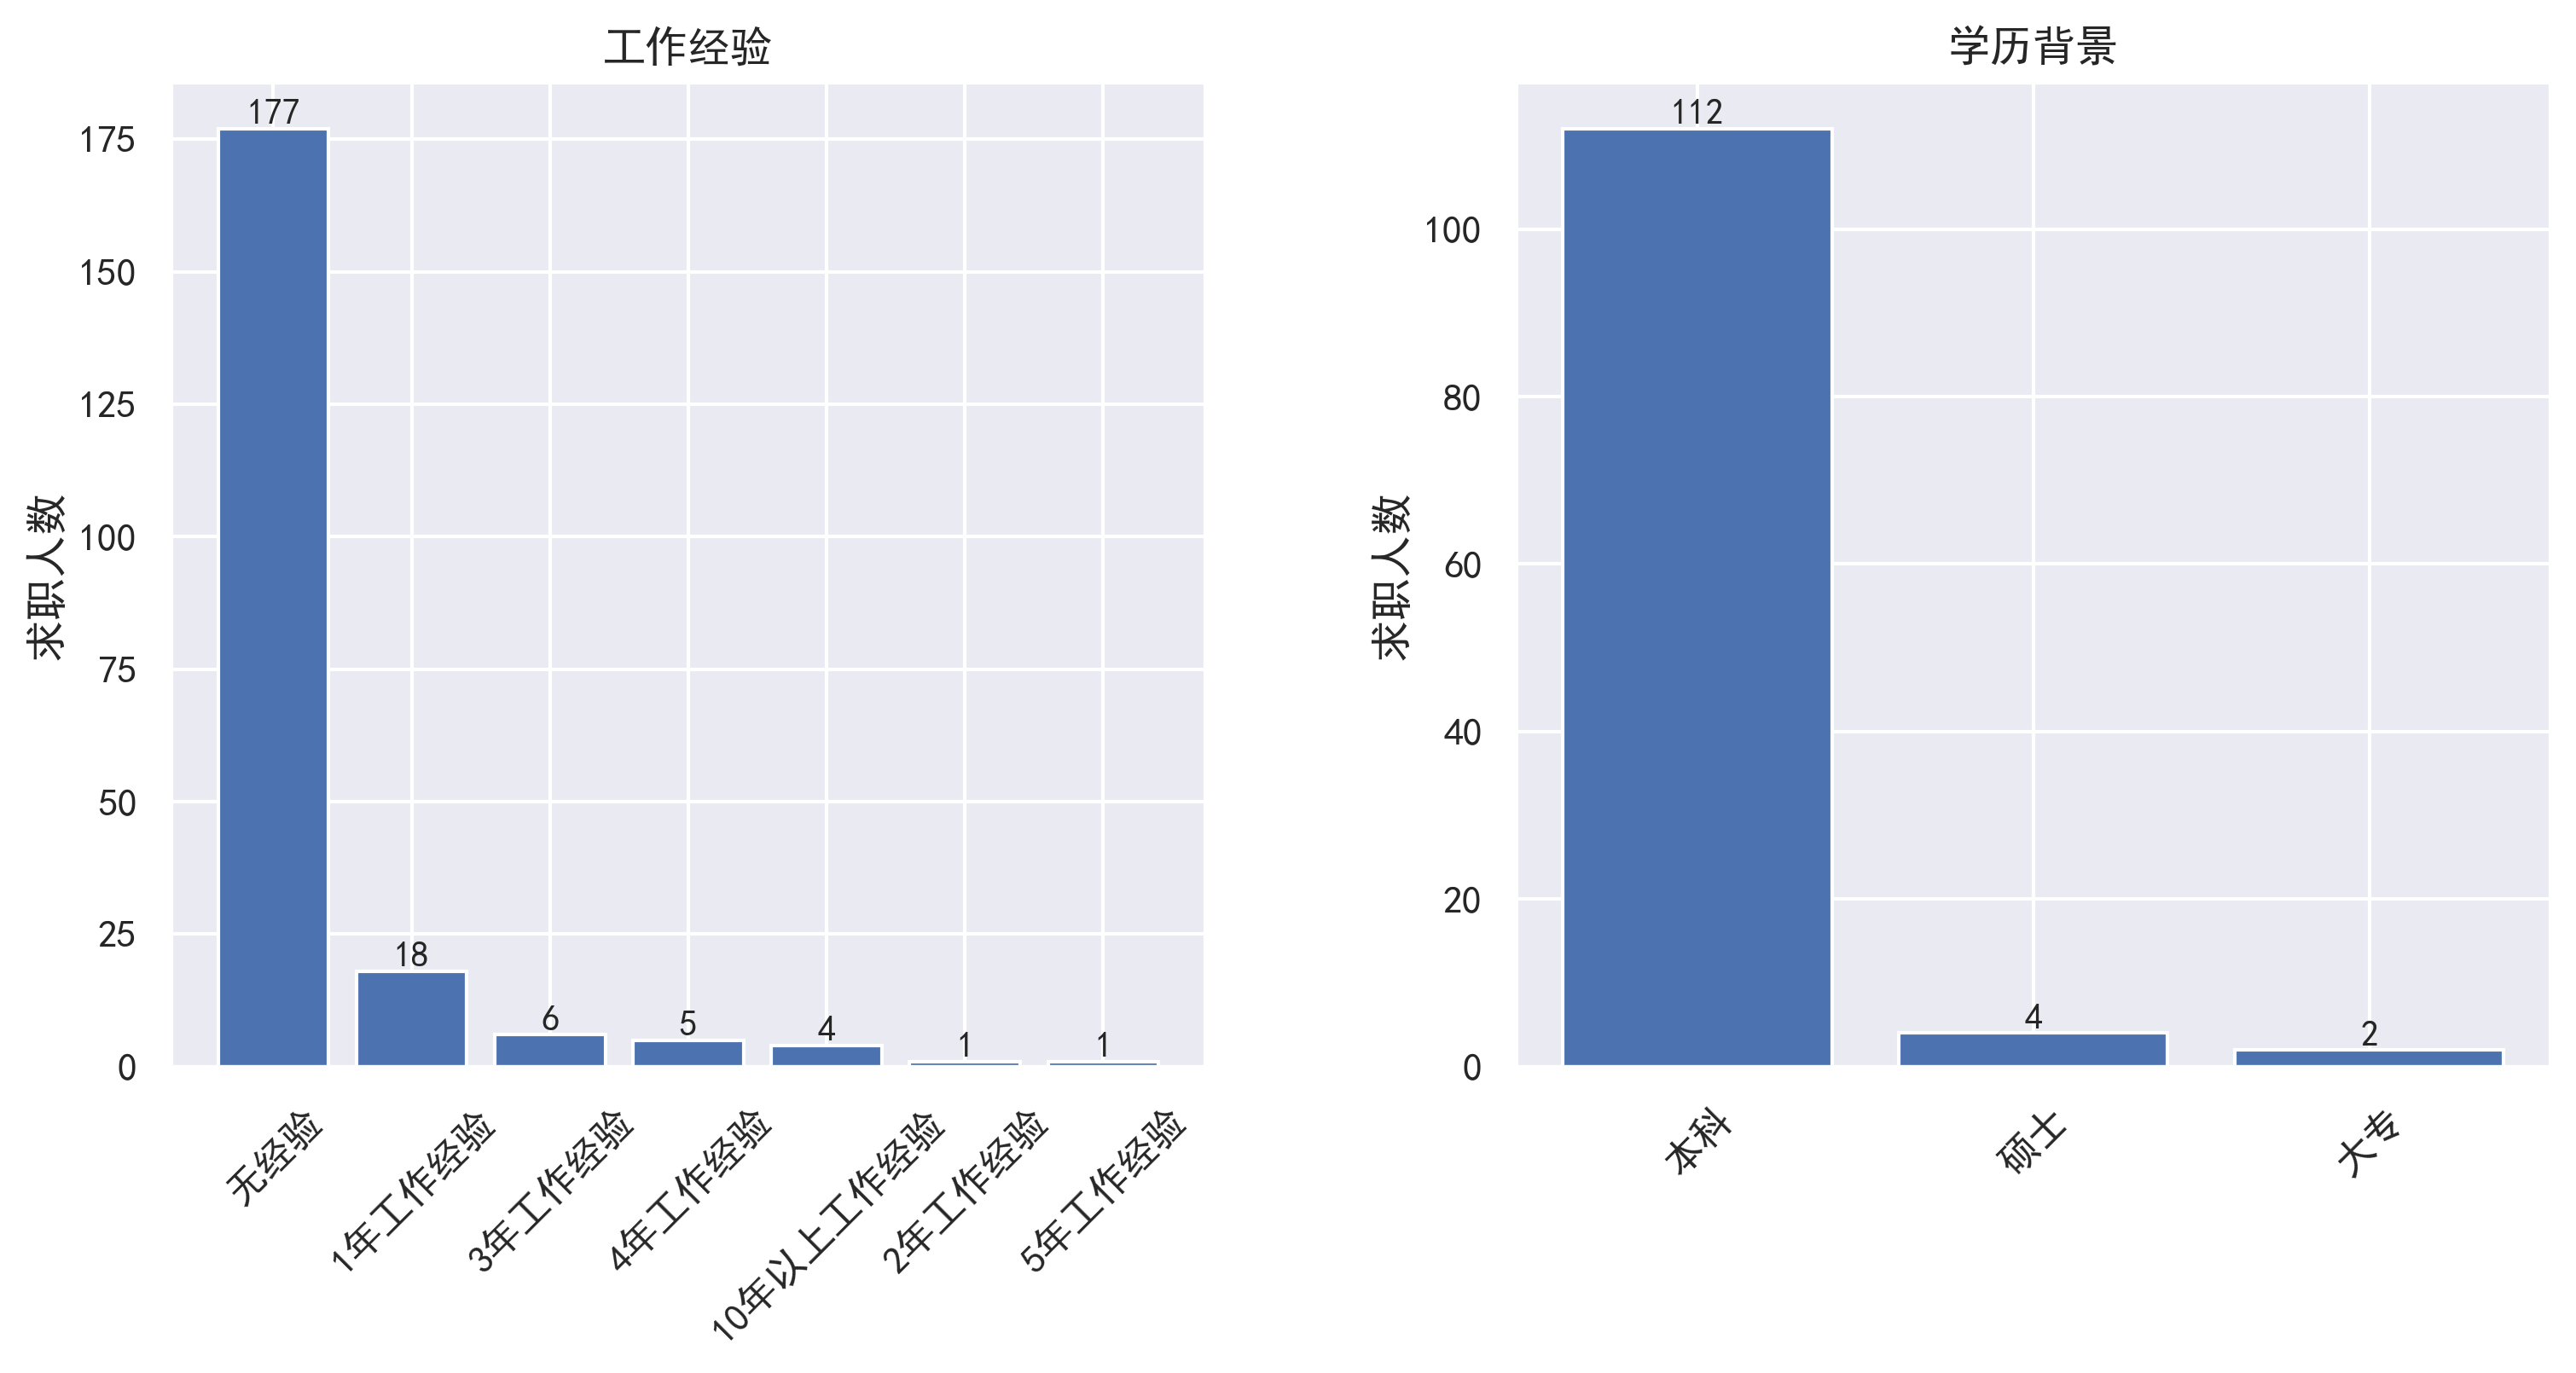

In [19]:
# 设置画布大小



plt.figure(figsize=(12,5), dpi=300,facecolor='w')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1)        # 解决Seaborn中文显示问题

# 第一张图
plt.subplot(1, 2, 1)
count_num = cut_ee['exp'].value_counts()
bar = plt.bar(count_num.index, count_num.values)#color="gray",edgecolor="k",hatch="///"
for x, y in zip(count_num.index, count_num.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)  # 显示数字
plt.xticks(rotation=45)
plt.title('工作经验')
# plt.xlabel('经验')
plt.ylabel('求职人数')

# 第二张图
plt.subplot(1, 2, 2)
cut_ee1 = cut_ee
cut_ee1[cut_ee1['eduEp_educationBackgrounds'] == '本科,硕士'] = '硕士'
cut_ee1[cut_ee1['eduEp_educationBackgrounds'] == '硕士,本科'] = '硕士'
count_num = cut_ee1['eduEp_educationBackgrounds'].value_counts()
bar = plt.bar(count_num.index, count_num.values)#,color="gray",edgecolor="k"
for x, y in zip(count_num.index, count_num.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)  # 显示数字
plt.xticks(rotation=45)
plt.title('学历背景')
# plt.xlabel('学历')
plt.ylabel('求职人数')

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.3)

# 显示图形
plt.savefig('学历经验.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
set(cut_ee1['eduEp_educationBackgrounds'])

{nan, '大专', '本科', '硕士'}